In [1]:
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt
import numpy as np
import regions
from astropy.io import fits
from astropy import wcs
from spectral_cube import SpectralCube
from spectral_cube import Projection
import dust_emissivity
from astropy.table import Table
from astropy.convolution import Gaussian1DKernel
from scipy.ndimage import binary_dilation


fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [20]:
#cube_nh3 = SpectralCube.read('/orange/adamginsburg/cmz/g5/code/testimages/nh3_33_cutout_g5.4.fits').with_spectral_unit(u.km / u.second, velocity_convention='radio')

In [24]:
cube_nh3 = SpectralCube.read('/orange/adamginsburg/cmz/g5/G5/hopsdata/G5subim.im', format='casa').with_spectral_unit(u.km / u.second, velocity_convention='radio')

/blue/adamginsburg/adamginsburg/repos/casa-formats-io/casa_formats_io/casa_dask.py:247: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [25]:
cube_nh3.header

FILENAME= '/orange/adamginsburg/cmz/g5/G5/hopsdata/G5subim.im'                  
BUNIT   = 'K       '                                                            
NAXIS   =                    3                                                  
NAXIS1  =                   72                                                  
NAXIS2  =                   70                                                  
NAXIS3  =                  931                                                  
WCSAXES =                    3 / Number of coordinate axes                      
CRPIX1  =                139.0 / Pixel coordinate of reference point            
CRPIX2  =                 61.0 / Pixel coordinate of reference point            
CRPIX3  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  -0.0083333339448597 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333394328 / [deg] Coordinate increment at reference point  
CDELT3  =     0.426796969764

In [26]:
wcs.WCS(cube_nh3.header)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-CAR'  'GLAT-CAR'  'VRAD'  
CRVAL : 4.50009550012  -0.00111728914947  -198341.17163075  
CRPIX : 139.0  61.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0083333339448597  0.00833333394328  426.79696976453005  
NAXIS : 72  70  931

In [41]:
cube_nh3.moment0()

<Projection [[ 8.72471692e-07,  1.74848970e-06, -1.94974165e-06, ...,
               6.04817896e-06, -5.75325392e-06, -4.52147383e-06],
             [ 1.01152646e-06,  2.59881088e-07, -1.44943764e-06, ...,
              -1.99945220e-06,  2.12176599e-06,  3.44545532e-06],
             [ 3.37850383e-07, -1.41966970e-06,  2.02973564e-06, ...,
               1.97489504e-06,  2.01333936e-06,  2.32286811e-06],
             ...,
             [ 2.14940367e-07, -3.99212231e-06, -7.19883782e-07, ...,
              -1.12128218e-06,  4.73753212e-07, -3.92268654e-06],
             [-2.66800420e-06,  1.49883145e-07, -8.53625283e-07, ...,
               4.69044249e-06,  3.96204382e-06,  7.90794601e-07],
             [ 2.14495680e-06,  1.60976721e-06, -2.62475614e-07, ...,
              -2.05299787e-06, -6.42920622e-07,  3.26994048e-08]] K km / s>

In [27]:
(wcs.utils.proj_plane_pixel_area(wcs.WCS(cube_nh3.header))*u.deg**2)

<Quantity 6.94444546e-05 deg2>

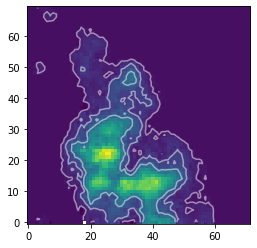

In [36]:
plt.imshow(cube_nh3.moment0().value)#.moment0().quicklook()
plt.gca().invert_yaxis()
plt.contour(cube_nh3.moment0().value, levels=[1, 5, 10], colors='white', alpha=0.5)

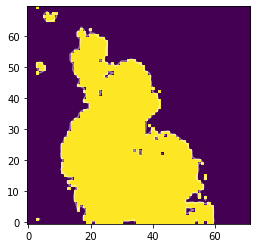

In [72]:
mask = cube_nh3.moment0() > 1 * u.K*u.km/u.second
plt.contour(cube_nh3.moment0().value, levels=[1], colors='white', alpha=0.5)
plt.imshow(mask)
plt.gca().invert_yaxis()


In [31]:
#(np.sum(mask)*(wcs.utils.proj_plane_pixel_area(wcs.WCS(cube_nh3.header))*u.deg**2)).to(u.rad**2)

In [12]:
#nh3cube = SpectralCube.read('/orange/adamginsburg/cmz/g5/code/testimages/nh3_33_cutout_g5.4.fits')
#nh3mask = binary_dilation((nh3cube > 0.25*nh3cube.unit).include(),
#                          iterations=2)
#m0_nh3 = nh3cube.with_mask(nh3mask).moment0()
#m0_nh3.quicklook()

In [23]:
cube_nh3.moment0()

<Projection [[ 0.0694681 ,  0.13921856, -0.15524268, ...,  0.4815692 ,
              -0.45808663, -0.36000961],
             [ 0.08053994,  0.0206923 , -0.11540739, ..., -0.15920075,
               0.16893964,  0.27433467],
             [ 0.02690038, -0.1130372 ,  0.16161198, ...,  0.15724545,
               0.16030647,  0.18495183],
             ...,
             [ 0.01711402, -0.31786149, -0.05731872, ..., -0.08927893,
               0.03772126, -0.31233286],
             [-0.21243232,  0.01193402, -0.06796751, ...,  0.37346327,
               0.31546657,  0.06296479],
             [ 0.17078614,  0.12817318, -0.02089888, ..., -0.16346417,
              -0.05119074,  0.0026036 ]] Hz K>

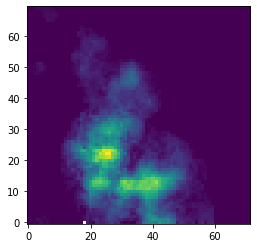

In [19]:
plt.imshow(np.multiply(mask, cube_nh3.moment0().data))
plt.gca().invert_yaxis()


In [49]:
ppmap = '/orange/adamginsburg/galactic_plane_surveys/higal/PPMAP_Results/l004_results/l004_cdens.fits'

In [57]:
Projection??

Init signature:
Projection(
    value,
    unit=None,
    dtype=None,
    copy=True,
    wcs=None,
    meta=None,
    mask=None,
    header=None,
    beam=None,
    fill_value=nan,
    read_beam=False,
    wcs_tolerance=0.0,
)
Docstring:      Generic class for 1D and 2D objects.
Source:        
class Projection(LowerDimensionalObject, SpatialCoordMixinClass,
                 MaskableArrayMixinClass, BeamMixinClass):

    def __new__(cls, value, unit=None, dtype=None, copy=True, wcs=None,
                meta=None, mask=None, header=None, beam=None,
                fill_value=np.nan, read_beam=False, wcs_tolerance=0.0):

        if np.asarray(value).ndim != 2:
            raise ValueError("value should be a 2-d array")

        if wcs is not None and wcs.wcs.naxis != 2:
            raise ValueError("wcs should have two dimensions")

        self = u.Quantity.__new__(cls, value, unit=unit, dtype=dtype,
                                  copy=copy).view(cls)
        self._wcs = wcs
       

INFO: Auto-setting vmin to -1.073e+01 [aplpy.core]
INFO: Auto-setting vmax to  2.520e+02 [aplpy.core]


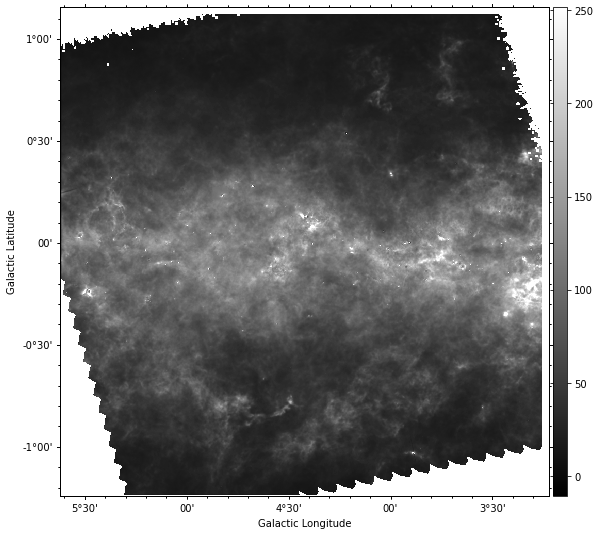

In [60]:
hdul = fits.open(ppmap)
ppmap_im =  Projection(hdul[0].data, unit=hdul[0].header['BUNIT'], wcs=wcs.WCS(hdul[0].header))
ppmap_im.quicklook()

In [69]:
ppmap_reproj = ppmap_im.reproject(cube_nh3.moment0().header)

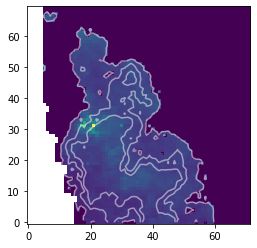

In [73]:
plt.imshow(ppmap_reproj.data*mask)#.quicklook()
plt.contour(cube_nh3.moment0().value, levels=[1, 5, 10], colors='white', alpha=0.5)
plt.gca().invert_yaxis()


In [77]:
d = 7*u.kpc
cden = (ppmap_reproj.data*mask) * (10**20) * u.cm**(-2)
ww = wcs.WCS(ppmap_reproj.header)
pix_area_2 = ww.celestial.proj_plane_pixel_area()
pix_area_cm_2 = (pix_area_2 * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_ppmap = np.nansum((pix_area_cm_2 * cden * u.Da*2.8).to(u.M_sun))
mass_ppmap

<Quantity 387124.8984591 solMass>

In [78]:
3.87e5 * u.Msun

<Quantity 387000. solMass>

In [ ]:
r0 = reg[0]
hdul = fits.open(ppmap)
ww = wcs.WCS(hdul[0].header)
preg = r0.to_pixel(ww)
mask = preg.to_mask()
cutout = mask.cutout(hdul[0].data)
#pixelarea = 1*u.pixel
cden = (mask.multiply(hdul[0].data) * (10**20) * u.cm**(-2))
        #* u.Unit(hdul[0].header['BUNIT']))
u.Unit(hdul[0].header['BUNIT'])

In [79]:
colden_ppmap = np.nanmean(cden)
colden_ppmap

<Quantity 3.7561393e+21 1 / cm2>

In [ ]:
pix_area_2 = ww.celestial.proj_plane_pixel_area()
pix_area_cm_2 = (pix_area_2 * d**2).to(u.parsec**2, equivalencies=u.dimensionless_angles()).to(u.cm**2)
mass_ppmap = (pix_area_cm_2 * cden * u.Da*2.8).to(u.M_sun).sum()
mass_ppmap

In [96]:
cold = fits.open('/orange/adamginsburg/galactic_plane_surveys/higal/PPMAP_Results/l004_results/l004_sigdiffcdens.fits')
#colden_ppmap_err = Projection((cold[0].data[5]), unit=cold[0].header['BUNIT'], wcs = wcs.WCS(cold[0].header))
#colden_ppmap_err.reproject(cube_nh3.moment0().header)   #* (10**20) * u.cm**(-2)
colden_ppmap_err = 4.3596794 * 10**20 * u.cm**-2
colden_ppmap_err

<Quantity 4.3596794e+20 1 / cm2>

In [97]:
mass_ppmap_err = mass_ppmap * colden_ppmap_err / colden_ppmap
mass_ppmap_err

<Quantity 44932.85020837 solMass>

In [99]:
0.45e5

45000.0